In [1]:

import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

StatementMeta(, df45edc7-727e-4fdf-97eb-844c0a822a60, 3, Finished, Available)

In [2]:
# df_original = pd.read_csv('loan_master_kiran.csv')
file_path = "abfss://ws_alertomonitor@onelake.dfs.fabric.microsoft.com/AOM_Lakehouse.Lakehouse/Tables/loan_master"
df_original = pd.read_parquet(file_path)
df = df_original.copy()
print("Shape of the dataset: ",df.shape)
df.head()

StatementMeta(, df45edc7-727e-4fdf-97eb-844c0a822a60, 4, Finished, Available)

Shape of the dataset:  (83997, 36)


,cust_id,loan_account_number,name,promoter,address,loan_purpose,loan_sanction_date,loan_maturity_date,repo_rate,Exposure,Industry,ratings_2023,ratings_2022,ratings_2021,ratings_by,Regulatory_News_Alert,Statutory_Dues_Delay,Vendor_Loss_Alert,Penalty_Alert,Business_Expansion_Alert,Competition_Alert,Low_Market_Demand,Employee_Attrittion,Exchange_Filing_Alert,Cross_Border_Alert,Value_Chain_Alert,Personal_Loans_Promoters,note_date,note_maturity_date,Collateral,Insured_Amt,commercial_operation_date,Renewal_Due_Date,loan_status,LimitExposure,RegionID
0,6306628,PQXM11646755906977,Hall-Garner,Daniel Bartlett,7706 Jeremy LakesSimmonsshire; OR 09239,termloan,2/23/2022,7/24/2025,4.918910,687504807,Others,BBB,A,A,Crisil,Medium,High,Medium,Medium,Medium,Medium,High,High,Medium,Medium,High,Medium,03-02-2022,03-02-2023,859381008.8,876568628.9,8/22/2022,1/20/2023,0,>500mn and <750mn,26
1,1346418,GCBX69554337830343,Mullen; Smith and Rollins,Laura Hancock,0110 Patrick Walk Apt. 363Leslieview; SC 82211,termloan,8/18/2021,7/22/2025,5.357487,99652328,Telecom,BBB,A,A,Crisil,Medium,Medium,Low,High,Low,Medium,Medium,High,Low,Medium,Medium,High,8/25/2021,8/25/2022,124565410.0,127056718.2,2/14/2022,7/15/2022,0,<250mn,18
2,7202249,QAWM45307096426576,Martin; Smith and Carter,Ebony Mason,807 Harrell CornerMatthewview; TN 46286,termloan,6/17/2021,9/21/2027,3.601569,696362003,Beverages,BBB,A,A,Crisil,Medium,High,Low,Low,Medium,Low,Low,High,Medium,Low,High,Medium,6/24/2021,6/24/2022,870452503.8,887861553.8,12/14/2021,5/14/2022,0,>500mn and <750mn,36
3,5941692,ALPZ23862218549028,Hernandez; Moreno and Johnson,Alan Ryan,39515 Morales Crescent Apt. 829West Stacy; TX ...,termloan,6/24/2022,5/14/2025,4.136133,593709142,Automible,BBB,A,A,Crisil,Medium,Medium,Low,Medium,Low,Medium,High,High,Medium,High,Medium,High,07-01-2022,07-01-2023,742136427.5,756979156.1,12/21/2022,5/21/2023,1,>500mn and <750mn,30
4,4225745,ZYTV31705638188352,Brady-Nguyen,Tyler Newman,46227 Romero Track Apt. 436West Jennifermouth;...,termloan,1/14/2021,1/30/2026,3.733810,487551960,Beverages,BBB,A,A,Crisil,Medium,High,Medium,Low,Medium,Medium,Low,High,Medium,High,Medium,Medium,1/21/2021,1/21/2022,609439950.0,621628749.0,7/13/2021,12-11-2021,0,>250mn and <500mn,35


In [3]:
df['loan_status'].value_counts()

StatementMeta(, 7a3e6305-9ed0-44ea-b79a-cc2bfcb474e5, 5, Finished, Available)

loan_status
0    58810
1    25187
Name: count, dtype: int64

In [4]:
df['loan_status'].isna().sum()

StatementMeta(, 7a3e6305-9ed0-44ea-b79a-cc2bfcb474e5, 6, Finished, Available)

0

In [5]:
df.isna().any(axis=1).sum()

StatementMeta(, 7a3e6305-9ed0-44ea-b79a-cc2bfcb474e5, 7, Finished, Available)

0

In [3]:
df['loan_sanction_date'] = pd.to_datetime(df['loan_sanction_date'],format='mixed')
df['loan_maturity_date'] = pd.to_datetime(df['loan_maturity_date'],format='mixed')
df['loan_term'] = df['loan_maturity_date'] - df['loan_sanction_date']
df['loan_term'] = df['loan_term'].dt.days.astype('int16')
df

StatementMeta(, df45edc7-727e-4fdf-97eb-844c0a822a60, 5, Finished, Available)

,cust_id,loan_account_number,name,promoter,address,loan_purpose,loan_sanction_date,loan_maturity_date,repo_rate,Exposure,Industry,ratings_2023,ratings_2022,ratings_2021,ratings_by,Regulatory_News_Alert,Statutory_Dues_Delay,Vendor_Loss_Alert,Penalty_Alert,Business_Expansion_Alert,Competition_Alert,Low_Market_Demand,Employee_Attrittion,Exchange_Filing_Alert,Cross_Border_Alert,Value_Chain_Alert,Personal_Loans_Promoters,note_date,note_maturity_date,Collateral,Insured_Amt,commercial_operation_date,Renewal_Due_Date,loan_status,LimitExposure,RegionID,loan_term
0,6306628,PQXM11646755906977,Hall-Garner,Daniel Bartlett,7706 Jeremy LakesSimmonsshire; OR 09239,termloan,2022-02-23,2025-07-24,4.918910,687504807,Others,BBB,A,A,Crisil,Medium,High,Medium,Medium,Medium,Medium,High,High,Medium,Medium,High,Medium,03-02-2022,03-02-2023,859381008.8,876568628.9,8/22/2022,1/20/2023,0,>500mn and <750mn,26,1247
1,1346418,GCBX69554337830343,Mullen; Smith and Rollins,Laura Hancock,0110 Patrick Walk Apt. 363Leslieview; SC 82211,termloan,2021-08-18,2025-07-22,5.357487,99652328,Telecom,BBB,A,A,Crisil,Medium,Medium,Low,High,Low,Medium,Medium,High,Low,Medium,Medium,High,8/25/2021,8/25/2022,124565410.0,127056718.2,2/14/2022,7/15/2022,0,<250mn,18,1434
2,7202249,QAWM45307096426576,Martin; Smith and Carter,Ebony Mason,807 Harrell CornerMatthewview; TN 46286,termloan,2021-06-17,2027-09-21,3.601569,696362003,Beverages,BBB,A,A,Crisil,Medium,High,Low,Low,Medium,Low,Low,High,Medium,Low,High,Medium,6/24/2021,6/24/2022,870452503.8,887861553.8,12/14/2021,5/14/2022,0,>500mn and <750mn,36,2287
3,5941692,ALPZ23862218549028,Hernandez; Moreno and Johnson,Alan Ryan,39515 Morales Crescent Apt. 829West Stacy; TX ...,termloan,2022-06-24,2025-05-14,4.136133,593709142,Automible,BBB,A,A,Crisil,Medium,Medium,Low,Medium,Low,Medium,High,High,Medium,High,Medium,High,07-01-2022,07-01-2023,742136427.5,756979156.1,12/21/2022,5/21/2023,1,>500mn and <750mn,30,1055
4,4225745,ZYTV31705638188352,Brady-Nguyen,Tyler Newman,46227 Romero Track Apt. 436West Jennifermouth;...,termloan,2021-01-14,2026-01-30,3.733810,487551960,Beverages,BBB,A,A,Crisil,Medium,High,Medium,Low,Medium,Medium,Low,High,Medium,High,Medium,Medium,1/21/2021,1/21/2022,609439950.0,621628749.0,7/13/2021,12-11-2021,0,>250mn and <500mn,35,1842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83992,6050147,TKSZ78689944977375,Green-Parker,Erin Brown DDS,PSC 0450; Box 9222APO AA 99036,termloan,2022-02-12,2027-07-12,4.966056,723119645,Construction,C,C,C,Crisil,Low,High,Medium,Medium,High,Low,Low,Low,Low,Low,High,High,2/19/2022,2/19/2023,903899556.3,921977547.4,08-11-2022,01-09-2023,0,>500mn and <750mn,44,1976
83993,9672400,FDAP85596097642165,May-Hood,Walter Perry,USNS PorterFPO AE 44099,working capital,2021-10-26,2025-02-26,2.794747,503975395,Construction,BB,BB,BB,Crisil,Low,High,High,Medium,High,High,Low,Medium,Low,Low,High,High,11-02-2021,11-02-2022,629969243.8,642568628.6,4/24/2022,9/22/2022,0,>500mn and <750mn,8,1219
83994,7239390,IYSA68944778021000,Nguyen-Contreras,Angel Lopez,85669 Jacob PineHillbury; OR 79112,termloan,2022-04-02,2027-02-02,2.897353,554792316,Construction,C,C,C,Crisil,Low,Low,Medium,Medium,High,High,High,High,Low,Low,High,High,04-09-2022,04-09-2023,693490395.0,707360202.9,9/29/2022,2/27/2023,1,>500mn and <750mn,31,1767
83995,9280446,DWZY12904136964609,Haynes-Copeland,Joel Cannon,9798 Oneal Shore Suite 726Guzmanstad; WV 01603,cash credit,2021-02-17,2028-06-26,4.526301,561601986,Construction,BB,BB,BB,Crisil,Low,Medium,Low,Medium,High,Medium,Medium,High,Low,Low,High,High,2/24/2021,2/24/2022,702002482.5,716042532.2,8/16/2021,1/14/2022,0,>500mn and <750mn,35,2686


In [4]:
df['note_date'] = pd.to_datetime(df['note_date'],format='mixed')
df['note_term'] = df['note_date'] - df['loan_sanction_date']
df['note_term'] = df['note_term'].dt.days.astype('int16')
df

StatementMeta(, df45edc7-727e-4fdf-97eb-844c0a822a60, 6, Finished, Available)

,cust_id,loan_account_number,name,promoter,address,loan_purpose,loan_sanction_date,loan_maturity_date,repo_rate,Exposure,Industry,ratings_2023,ratings_2022,ratings_2021,ratings_by,Regulatory_News_Alert,Statutory_Dues_Delay,Vendor_Loss_Alert,Penalty_Alert,Business_Expansion_Alert,Competition_Alert,Low_Market_Demand,Employee_Attrittion,Exchange_Filing_Alert,Cross_Border_Alert,Value_Chain_Alert,Personal_Loans_Promoters,note_date,note_maturity_date,Collateral,Insured_Amt,commercial_operation_date,Renewal_Due_Date,loan_status,LimitExposure,RegionID,loan_term,note_term
0,6306628,PQXM11646755906977,Hall-Garner,Daniel Bartlett,7706 Jeremy LakesSimmonsshire; OR 09239,termloan,2022-02-23,2025-07-24,4.918910,687504807,Others,BBB,A,A,Crisil,Medium,High,Medium,Medium,Medium,Medium,High,High,Medium,Medium,High,Medium,2022-03-02,03-02-2023,859381008.8,876568628.9,8/22/2022,1/20/2023,0,>500mn and <750mn,26,1247,7
1,1346418,GCBX69554337830343,Mullen; Smith and Rollins,Laura Hancock,0110 Patrick Walk Apt. 363Leslieview; SC 82211,termloan,2021-08-18,2025-07-22,5.357487,99652328,Telecom,BBB,A,A,Crisil,Medium,Medium,Low,High,Low,Medium,Medium,High,Low,Medium,Medium,High,2021-08-25,8/25/2022,124565410.0,127056718.2,2/14/2022,7/15/2022,0,<250mn,18,1434,7
2,7202249,QAWM45307096426576,Martin; Smith and Carter,Ebony Mason,807 Harrell CornerMatthewview; TN 46286,termloan,2021-06-17,2027-09-21,3.601569,696362003,Beverages,BBB,A,A,Crisil,Medium,High,Low,Low,Medium,Low,Low,High,Medium,Low,High,Medium,2021-06-24,6/24/2022,870452503.8,887861553.8,12/14/2021,5/14/2022,0,>500mn and <750mn,36,2287,7
3,5941692,ALPZ23862218549028,Hernandez; Moreno and Johnson,Alan Ryan,39515 Morales Crescent Apt. 829West Stacy; TX ...,termloan,2022-06-24,2025-05-14,4.136133,593709142,Automible,BBB,A,A,Crisil,Medium,Medium,Low,Medium,Low,Medium,High,High,Medium,High,Medium,High,2022-07-01,07-01-2023,742136427.5,756979156.1,12/21/2022,5/21/2023,1,>500mn and <750mn,30,1055,7
4,4225745,ZYTV31705638188352,Brady-Nguyen,Tyler Newman,46227 Romero Track Apt. 436West Jennifermouth;...,termloan,2021-01-14,2026-01-30,3.733810,487551960,Beverages,BBB,A,A,Crisil,Medium,High,Medium,Low,Medium,Medium,Low,High,Medium,High,Medium,Medium,2021-01-21,1/21/2022,609439950.0,621628749.0,7/13/2021,12-11-2021,0,>250mn and <500mn,35,1842,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83992,6050147,TKSZ78689944977375,Green-Parker,Erin Brown DDS,PSC 0450; Box 9222APO AA 99036,termloan,2022-02-12,2027-07-12,4.966056,723119645,Construction,C,C,C,Crisil,Low,High,Medium,Medium,High,Low,Low,Low,Low,Low,High,High,2022-02-19,2/19/2023,903899556.3,921977547.4,08-11-2022,01-09-2023,0,>500mn and <750mn,44,1976,7
83993,9672400,FDAP85596097642165,May-Hood,Walter Perry,USNS PorterFPO AE 44099,working capital,2021-10-26,2025-02-26,2.794747,503975395,Construction,BB,BB,BB,Crisil,Low,High,High,Medium,High,High,Low,Medium,Low,Low,High,High,2021-11-02,11-02-2022,629969243.8,642568628.6,4/24/2022,9/22/2022,0,>500mn and <750mn,8,1219,7
83994,7239390,IYSA68944778021000,Nguyen-Contreras,Angel Lopez,85669 Jacob PineHillbury; OR 79112,termloan,2022-04-02,2027-02-02,2.897353,554792316,Construction,C,C,C,Crisil,Low,Low,Medium,Medium,High,High,High,High,Low,Low,High,High,2022-04-09,04-09-2023,693490395.0,707360202.9,9/29/2022,2/27/2023,1,>500mn and <750mn,31,1767,7
83995,9280446,DWZY12904136964609,Haynes-Copeland,Joel Cannon,9798 Oneal Shore Suite 726Guzmanstad; WV 01603,cash credit,2021-02-17,2028-06-26,4.526301,561601986,Construction,BB,BB,BB,Crisil,Low,Medium,Low,Medium,High,Medium,Medium,High,Low,Low,High,High,2021-02-24,2/24/2022,702002482.5,716042532.2,8/16/2021,1/14/2022,0,>500mn and <750mn,35,2686,7


In [9]:
rslt_df = df.loc[df['note_term'] != 7]
rslt_df

StatementMeta(, 7a3e6305-9ed0-44ea-b79a-cc2bfcb474e5, 11, Finished, Available)

,cust_id,loan_account_number,name,promoter,address,loan_purpose,loan_sanction_date,loan_maturity_date,repo_rate,Exposure,Industry,ratings_2023,ratings_2022,ratings_2021,ratings_by,Regulatory_News_Alert,Statutory_Dues_Delay,Vendor_Loss_Alert,Penalty_Alert,Business_Expansion_Alert,Competition_Alert,Low_Market_Demand,Employee_Attrittion,Exchange_Filing_Alert,Cross_Border_Alert,Value_Chain_Alert,Personal_Loans_Promoters,note_date,note_maturity_date,Collateral,Insured_Amt,commercial_operation_date,Renewal_Due_Date,loan_status,LimitExposure,RegionID,loan_term,note_term


The difference between loan_sanction_date and note_date is always 7 days and the difference between note_date and note_maturity_date is always one year. Thus note_date and note_maturirty date are linearly dependent to loan_sanction date. Thus eliminating these two columns. The signifincance of commercial_operation_date and Renewal_Due_Date on the loan_status is not found. 

In [5]:
from sklearn.preprocessing import LabelEncoder

categ_columns = ['name', 'promoter', 'loan_purpose','Industry','ratings_2023','ratings_2022','ratings_2021','Regulatory_News_Alert', 'Statutory_Dues_Delay', 'Vendor_Loss_Alert',
       'Penalty_Alert', 'Business_Expansion_Alert', 'Competition_Alert',
       'Low_Market_Demand', 'Employee_Attrittion', 'Exchange_Filing_Alert',
       'Cross_Border_Alert', 'Value_Chain_Alert', 'Personal_Loans_Promoters','LimitExposure']

#perform label encoding across multiple columns
df[categ_columns] = df[categ_columns].apply(LabelEncoder().fit_transform)
df.head()

StatementMeta(, df45edc7-727e-4fdf-97eb-844c0a822a60, 7, Finished, Available)

,cust_id,loan_account_number,name,promoter,address,loan_purpose,loan_sanction_date,loan_maturity_date,repo_rate,Exposure,Industry,ratings_2023,ratings_2022,ratings_2021,ratings_by,Regulatory_News_Alert,Statutory_Dues_Delay,Vendor_Loss_Alert,Penalty_Alert,Business_Expansion_Alert,Competition_Alert,Low_Market_Demand,Employee_Attrittion,Exchange_Filing_Alert,Cross_Border_Alert,Value_Chain_Alert,Personal_Loans_Promoters,note_date,note_maturity_date,Collateral,Insured_Amt,commercial_operation_date,Renewal_Due_Date,loan_status,LimitExposure,RegionID,loan_term,note_term
0,6306628,PQXM11646755906977,28392,14185,7706 Jeremy LakesSimmonsshire; OR 09239,2,2022-02-23,2025-07-24,4.918910,687504807,8,5,0,0,Crisil,2,0,2,2,2,2,0,0,2,2,0,2,2022-03-02,03-02-2023,859381008.8,876568628.9,8/22/2022,1/20/2023,0,2,26,1247,7
1,1346418,GCBX69554337830343,52401,36083,0110 Patrick Walk Apt. 363Leslieview; SC 82211,2,2021-08-18,2025-07-22,5.357487,99652328,10,5,0,0,Crisil,2,2,1,0,1,2,2,0,1,2,2,0,2021-08-25,8/25/2022,124565410.0,127056718.2,2/14/2022,7/15/2022,0,0,18,1434,7
2,7202249,QAWM45307096426576,45461,18591,807 Harrell CornerMatthewview; TN 46286,2,2021-06-17,2027-09-21,3.601569,696362003,1,5,0,0,Crisil,2,0,1,1,2,1,1,0,2,1,0,2,2021-06-24,6/24/2022,870452503.8,887861553.8,12/14/2021,5/14/2022,0,2,36,2287,7
3,5941692,ALPZ23862218549028,31691,675,39515 Morales Crescent Apt. 829West Stacy; TX ...,2,2022-06-24,2025-05-14,4.136133,593709142,0,5,0,0,Crisil,2,2,1,2,1,2,0,0,2,0,2,0,2022-07-01,07-01-2023,742136427.5,756979156.1,12/21/2022,5/21/2023,1,2,30,1055,7
4,4225745,ZYTV31705638188352,7023,59784,46227 Romero Track Apt. 436West Jennifermouth;...,2,2021-01-14,2026-01-30,3.733810,487551960,1,5,0,0,Crisil,2,0,2,1,2,2,1,0,2,0,2,2,2021-01-21,1/21/2022,609439950.0,621628749.0,7/13/2021,12-11-2021,0,1,35,1842,7


In [6]:
del_col_names = ["name", "promoter","cust_id","address", "ratings_by","loan_account_number"] #deleting some more columns
date_columns = ['loan_sanction_date', 'loan_maturity_date', 'note_date', 'note_maturity_date', 'commercial_operation_date', 'Renewal_Due_Date','note_term']
df = df.drop(labels = del_col_names, axis = 1) 
df = df.drop(labels = date_columns, axis = 1)
print(df.shape)
df.head()

StatementMeta(, df45edc7-727e-4fdf-97eb-844c0a822a60, 8, Finished, Available)

(83997, 25)


,loan_purpose,repo_rate,Exposure,Industry,ratings_2023,ratings_2022,ratings_2021,Regulatory_News_Alert,Statutory_Dues_Delay,Vendor_Loss_Alert,Penalty_Alert,Business_Expansion_Alert,Competition_Alert,Low_Market_Demand,Employee_Attrittion,Exchange_Filing_Alert,Cross_Border_Alert,Value_Chain_Alert,Personal_Loans_Promoters,Collateral,Insured_Amt,loan_status,LimitExposure,RegionID,loan_term
0,2,4.918910,687504807,8,5,0,0,2,0,2,2,2,2,0,0,2,2,0,2,859381008.8,876568628.9,0,2,26,1247
1,2,5.357487,99652328,10,5,0,0,2,2,1,0,1,2,2,0,1,2,2,0,124565410.0,127056718.2,0,0,18,1434
2,2,3.601569,696362003,1,5,0,0,2,0,1,1,2,1,1,0,2,1,0,2,870452503.8,887861553.8,0,2,36,2287
3,2,4.136133,593709142,0,5,0,0,2,2,1,2,1,2,0,0,2,0,2,0,742136427.5,756979156.1,1,2,30,1055
4,2,3.733810,487551960,1,5,0,0,2,0,2,1,2,2,1,0,2,0,2,2,609439950.0,621628749.0,0,1,35,1842


In [7]:
scl = preprocessing.StandardScaler() #instance of preprocessing
fields = list(df.columns)
fields.remove("loan_status")
data_clean = pd.DataFrame(scl.fit_transform(df[fields]), columns = fields)
data_clean['loan_status'] = df['loan_status']
data_clean['loan_status'].value_counts()

StatementMeta(, df45edc7-727e-4fdf-97eb-844c0a822a60, 9, Finished, Available)

loan_status
0    58810
1    25187
Name: count, dtype: int64

In [29]:
data_clean.corr()

StatementMeta(, 7a3e6305-9ed0-44ea-b79a-cc2bfcb474e5, 31, Finished, Available)

,loan_purpose,repo_rate,Exposure,Industry,ratings_2023,ratings_2022,ratings_2021,Regulatory_News_Alert,Statutory_Dues_Delay,Vendor_Loss_Alert,Penalty_Alert,Business_Expansion_Alert,Competition_Alert,Low_Market_Demand,Employee_Attrittion,Exchange_Filing_Alert,Cross_Border_Alert,Value_Chain_Alert,Personal_Loans_Promoters,Collateral,Insured_Amt,LimitExposure,RegionID,loan_term,loan_status
loan_purpose,1.000000,0.004941,-0.001827,0.006486,0.002188,0.001620,0.000831,0.001633,-0.001263,-0.001194,-0.000821,-0.001338,0.005281,-0.006884,0.000438,0.000844,-0.003968,0.000397,0.002113,-0.001827,-0.001827,-0.002313,0.003345,0.003264,-0.000349
repo_rate,0.004941,1.000000,0.005005,0.000606,-0.002511,-0.004730,-0.004207,-0.004711,0.004312,-0.003197,0.001880,-0.000846,-0.007333,0.001198,0.000264,0.003051,0.002676,0.000527,-0.002991,0.005005,0.005005,0.005157,0.001847,-0.001163,0.000830
Exposure,-0.001827,0.005005,1.000000,0.002120,0.002714,0.001099,0.001145,-0.000068,-0.003844,-0.002004,0.002278,-0.001693,0.001415,-0.002967,-0.005388,0.002220,-0.000926,0.005515,0.005890,1.000000,1.000000,0.942209,-0.000002,0.001674,-0.000453
Industry,0.006486,0.000606,0.002120,1.000000,-0.001063,-0.002169,-0.001815,-0.005043,0.001050,0.003980,-0.001317,0.001052,-0.002220,-0.001412,0.002968,0.005025,-0.001866,-0.000984,-0.002658,0.002120,0.002120,0.002818,-0.001692,0.001990,-0.007220
ratings_2023,0.002188,-0.002511,0.002714,-0.001063,1.000000,0.958862,0.968222,-0.003939,-0.003561,-0.002342,-0.000037,0.002001,0.008529,0.000878,0.002522,-0.006290,-0.002114,-0.001237,0.003893,0.002714,0.002714,0.002452,0.000299,0.001446,-0.000779
ratings_2022,0.001620,-0.004730,0.001099,-0.002169,0.958862,1.000000,0.993954,-0.002435,-0.004626,-0.002242,-0.001939,0.003203,0.008317,0.000162,0.001686,-0.007374,-0.001370,-0.001385,0.003713,0.001099,0.001099,0.001116,0.001375,0.001302,-0.000815
ratings_2021,0.000831,-0.004207,0.001145,-0.001815,0.968222,0.993954,1.000000,-0.002604,-0.004621,-0.001981,-0.001576,0.002911,0.008784,0.000244,0.002108,-0.007007,-0.001731,-0.001190,0.003817,0.001145,0.001145,0.001148,0.001637,0.001336,-0.000960
Regulatory_News_Alert,0.001633,-0.004711,-0.000068,-0.005043,-0.003939,-0.002435,-0.002604,1.000000,0.000051,-0.001375,-0.001685,0.004705,0.000590,-0.001522,-0.000292,-0.003856,0.003806,-0.004516,-0.003801,-0.000068,-0.000068,0.000379,-0.000054,-0.002051,0.000694
Statutory_Dues_Delay,-0.001263,0.004312,-0.003844,0.001050,-0.003561,-0.004626,-0.004621,0.000051,1.000000,-0.004710,-0.000099,0.001789,-0.001288,0.000898,-0.001901,-0.003109,0.002709,-0.001808,0.006225,-0.003844,-0.003844,-0.004356,-0.002583,0.003141,-0.001778
Vendor_Loss_Alert,-0.001194,-0.003197,-0.002004,0.003980,-0.002342,-0.002242,-0.001981,-0.001375,-0.004710,1.000000,0.002267,-0.000167,0.000582,0.006628,-0.008284,0.001360,0.002401,-0.001964,0.006043,-0.002004,-0.002004,-0.002463,0.004243,-0.007364,0.002041


In [8]:
#Create X
X = data_clean.drop(['loan_status'], axis=1)
#Create y
y = data_clean['loan_status']
print(X.shape)
print(y.shape)

StatementMeta(, df45edc7-727e-4fdf-97eb-844c0a822a60, 10, Finished, Available)

(83997, 24)
(83997,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
bs_train, bs_test = train_test_split(data_clean, test_size = 0.3, random_state=42) #just for bootstrapping

StatementMeta(, df45edc7-727e-4fdf-97eb-844c0a822a60, 11, Finished, Available)

In [32]:
X_train.shape

StatementMeta(, 7a3e6305-9ed0-44ea-b79a-cc2bfcb474e5, 34, Finished, Available)

(58797, 24)

In [33]:
X_test.shape

StatementMeta(, 7a3e6305-9ed0-44ea-b79a-cc2bfcb474e5, 35, Finished, Available)

(25200, 24)

In [10]:
randomForest = RandomForestClassifier(bootstrap=True,criterion = "gini",max_features=5, n_estimators=100)
randomForest.fit(X_train,y_train)


#complete dataset
rfPredict_full = randomForest.predict(X)
rfPredictproba_full = randomForest.predict_proba(X)[:,1] #for ROC curve
rfAccuracy_full = accuracy_score(y,rfPredict_full)
roc_score_full = metrics.roc_auc_score(y,rfPredict_full)
print("Accuracy for the complete dataset : ",rfAccuracy_full)



StatementMeta(, df45edc7-727e-4fdf-97eb-844c0a822a60, 12, Finished, Available)

2024-02-09:11:02:07,563 WARNING  [tracking_store.py:153] log_inputs not supported


2024-02-09:11:03:00,878 WARNING  [tracking_store.py:153] log_inputs not supported
2024-02-09:11:03:02,604 WARNING  [tracking_store.py:153] log_inputs not supported


Accuracy for the complete dataset :  0.9106515708894365


In [11]:
# Train dataset
rfPredict_train = randomForest.predict(X_train)
rfPredictproba_train = randomForest.predict_proba(X_train)[:,1] #for ROC curve
rfAccuracy_train = accuracy_score(y_train,rfPredict_train)
roc_score_train = metrics.roc_auc_score(y_train,rfPredict_train)
print("Accuracy for the train dataset : ",rfAccuracy_train)


StatementMeta(, df45edc7-727e-4fdf-97eb-844c0a822a60, 13, Finished, Available)

2024-02-09:11:03:06,452 WARNING  [tracking_store.py:153] log_inputs not supported
2024-02-09:11:03:07,826 WARNING  [tracking_store.py:153] log_inputs not supported


Accuracy for the train dataset :  1.0


In [12]:
# Test Dataset
rfPredict_test = randomForest.predict(X_test)
rfPredictproba_test = randomForest.predict_proba(X_test)[:,1] #for ROC curve
rfAccuracy_test = accuracy_score(y_test,rfPredict_test)
roc_score_test = metrics.roc_auc_score(y_test,rfPredict_test)
print("Accuracy for the test dataset : ",rfAccuracy_test)


StatementMeta(, df45edc7-727e-4fdf-97eb-844c0a822a60, 14, Finished, Available)

2024-02-09:11:03:11,286 WARNING  [tracking_store.py:153] log_inputs not supported
2024-02-09:11:03:11,932 WARNING  [tracking_store.py:153] log_inputs not supported


Accuracy for the test dataset :  0.7021825396825396


StatementMeta(, 7a3e6305-9ed0-44ea-b79a-cc2bfcb474e5, 41, Finished, Available)

Text(0, 0.5, 'Normalized Gini Importance')

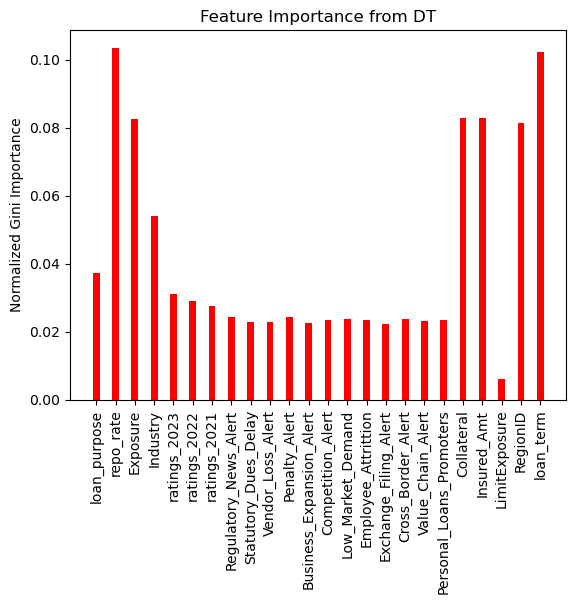

In [39]:
features = fields
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(features)), randomForest.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(randomForest.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

Sorted Features


StatementMeta(, df45edc7-727e-4fdf-97eb-844c0a822a60, 16, Finished, Available)

Text(0, 0.5, 'Normalized Gini Importance')

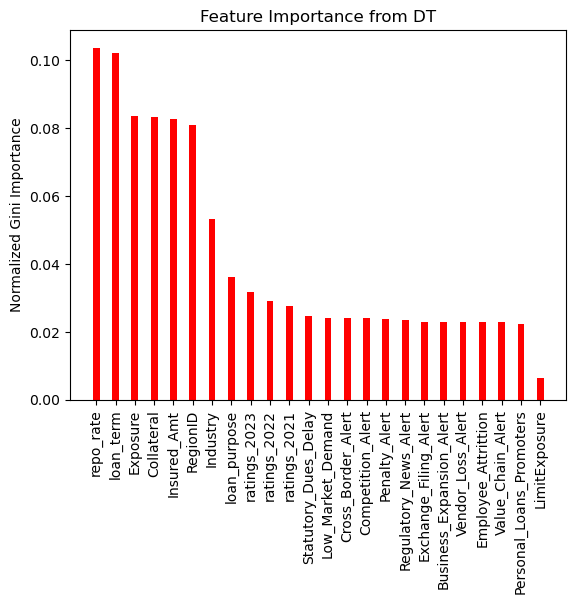

In [14]:
features = fields
features_imp = zip(randomForest.feature_importances_,features)
sorted_features_imp = sorted(features_imp,key=lambda x:x[0],reverse = True)
sorted_imp, sorted_features = zip(*sorted_features_imp)
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(features)), sorted_imp, width, color='r')
ax.set_xticks(np.arange(len(randomForest.feature_importances_)))
ax.set_xticklabels(sorted_features,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

In [15]:
#Writing results for complete dataset
prediction_df_full = pd.DataFrame(columns=["cust_id", "probability_of_recovery","loanmaster_Account_Name"]) 
for i in range(len(X.index)):
    index = X.index[i]
    # if rfPredict_full[index] == 1:
    records = {
        "cust_id" : df_original.loc[index]['cust_id'], 
        "probability_of_recovery" : (1 - rfPredictproba_full[i]) * 100 , 
        "loanmaster_Account_Name" : df_original.loc[index]['name']
    }
    prediction_df_full = prediction_df_full._append(records, ignore_index = True)
# prediction_df['probability_of_recovery'] = prediction_df['probability_of_recovery'].map('{:.2%}'.format)
prediction_df_full

StatementMeta(, df45edc7-727e-4fdf-97eb-844c0a822a60, 17, Finished, Available)

,cust_id,probability_of_recovery,loanmaster_Account_Name
0,6306628,86.0,Hall-Garner
1,1346418,90.0,Mullen; Smith and Rollins
2,7202249,88.0,Martin; Smith and Carter
3,5941692,24.0,Hernandez; Moreno and Johnson
4,4225745,76.0,Brady-Nguyen
...,...,...,...
83992,6050147,84.0,Green-Parker
83993,9672400,65.0,May-Hood
83994,7239390,72.0,Nguyen-Contreras
83995,9280446,91.0,Haynes-Copeland


In [16]:
#Writing results for defaulters
prediction_df_filtered = pd.DataFrame(columns=["cust_id", "probability_of_recovery","loanmaster_Account_Name"]) 
for i in range(len(X.index)):
    index = X.index[i]
    if rfPredict_full[index] == 1:
        records = {
            "cust_id" : df_original.loc[index]['cust_id'], 
            "probability_of_recovery" : (1 - rfPredictproba_full[index]) * 100 , 
            "loanmaster_Account_Name" : df_original.loc[index]['name']
        }
        prediction_df_filtered = prediction_df_filtered._append(records, ignore_index = True)
# prediction_df['probability_of_recovery'] = prediction_df['probability_of_recovery'].map('{:.2%}'.format)
prediction_df_filtered

StatementMeta(, df45edc7-727e-4fdf-97eb-844c0a822a60, 18, Finished, Available)

,cust_id,probability_of_recovery,loanmaster_Account_Name
0,5941692,24.0,Hernandez; Moreno and Johnson
1,1932447,21.0,Moreno-Graham
2,2135813,22.0,Hull; Skinner and Dean
3,1626666,28.0,Simpson; Mitchell and Wolfe
4,9036935,19.0,Wright-Dominguez
...,...,...,...
17717,6237286,22.0,Hall-Hood
17718,5293974,28.0,Valdez-Watson
17719,7850853,21.0,Hurley-Martinez
17720,7901886,25.0,Proctor-Jensen


In [21]:
directory_path = 'abfss://ws_alertomonitor@onelake.dfs.fabric.microsoft.com/AOM_Lakehouse.Lakehouse/'
prediction_full_filepath = directory_path + "Tables/Probability_of_Recovery"
prediction_df_full_write=spark.createDataFrame(prediction_df_full)
prediction_df_full_write.write.format("delta").mode("overwrite").save(prediction_full_filepath)


directory_path = 'abfss://ws_alertomonitor@onelake.dfs.fabric.microsoft.com/AOM_Lakehouse.Lakehouse/'
prediction_filtered_filepath = directory_path + "Tables/Probability_of_Recovery_defaulters"
prediction_df_filtered_write=spark.createDataFrame(prediction_df_filtered)
prediction_df_filtered_write.write.format("delta").mode("overwrite").save(prediction_filtered_filepath)

StatementMeta(, df45edc7-727e-4fdf-97eb-844c0a822a60, 23, Finished, Available)

In [23]:
# file_path = "abfss://ws_alertomonitor@onelake.dfs.fabric.microsoft.com/AOM_Lakehouse.Lakehouse/Tables/Probability_of_Recovery"
# df2 = pd.read_parquet(file_path)
# # df = df_original.copy()
# print("Shape of the dataset: ",df2.shape)
# df2.head()

StatementMeta(, df45edc7-727e-4fdf-97eb-844c0a822a60, 25, Finished, Available)

Shape of the dataset:  (83997, 3)


,cust_id,probability_of_recovery,loanmaster_Account_Name
0,5356485,99.0,Young; Wagner and Gillespie
1,8987182,47.0,Torres LLC
2,4846159,43.0,Mcneil; Thomas and Burgess
3,8729091,47.0,Padilla; Ali and Wagner
4,8639633,42.0,Long; Carpenter and Smith


In [10]:
# file_path = "abfss://ws_alertomonitor@onelake.dfs.fabric.microsoft.com/AOM_Lakehouse.Lakehouse/Tables/Probability_of_Recovery"
# df2 = pd.read_parquet(file_path)
# # df = df_original.copy()
# print("Shape of the dataset: ",df2.shape)
# df2.head()

StatementMeta(, 7a3e6305-9ed0-44ea-b79a-cc2bfcb474e5, 12, Finished, Available)

Shape of the dataset:  (125557, 3)


,cust_id,probability_of_recovery,loanmaster_Account_Name
0,8293179,42.0,Bruce; Ballard and Sutton
1,3424373,10.0,Chen-Salazar
2,7198942,99.0,Montes-Roman
3,4115539,9.0,Walker-Davidson
4,1428188,49.0,Fox-Rogers
